# Python Data Science Handbook

## 3. Data Manipulation with Pandas

In [1]:
import pandas
pandas.__version__

'1.4.4'

In [3]:
import pandas as pd

In [4]:
pd?

Type:        module
String form: <module 'pandas' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>
File:        c:\programdata\anaconda3\lib\site-packages\pandas\__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be ins

### Introducing Pandas Objects

In [5]:
import numpy as np
import pandas as pd

### The Pandas Series Object

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [7]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [8]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [9]:
data[1]

0.5

In [10]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as Generalized NumPy Array

In [11]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [12]:
data['b']

0.5

In [13]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = [2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [14]:
data[5]

0.5

### Series as Specialized Dictionary

In [15]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}
population = pd.Series(population_dict)

population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [16]:
population['California']

39538223

In [18]:
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

### Constructing Series Objects

In [20]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [22]:
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [23]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [24]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[1, 2])

1    b
2    a
dtype: object

### DataFrame as Generalized NumPy Array

In [25]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
             'New York': 141297, 'Pennsylvania': 119280}

area = pd.Series(area_dict)

area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

In [27]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [28]:
states.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

In [29]:
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as Specialized Dictionary

In [30]:
states['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

### Constructing DataFrame Objects

In [31]:
pd.DataFrame(population, columns = ['population'])

,population
California,39538223
Texas,29145505
Florida,21538187
New York,20201249
Pennsylvania,13002700


In [32]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]

pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [33]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [34]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [35]:
pd.DataFrame(np.random.rand(3, 2),
             columns = ['foo', 'bar'],
             index = ['a', 'b', 'c'])

,foo,bar
a,0.385912,0.185063
b,0.620482,0.206212
c,0.550815,0.447333


In [37]:
A = np.zeros(3, dtype = [('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [38]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

In [39]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as Immutable Array

In [41]:
ind[1]

3

In [42]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [43]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


### Index as Ordered Set

In [45]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [46]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [47]:
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [48]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

### Series as Dictionary

In [1]:
import pandas as pd

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [5]:
data['b']

0.5

In [6]:
'a' in data

True

In [7]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [9]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as One-Dimensional Array

In [11]:
# Slicicng by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [12]:
# Slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [13]:
# Masking
data[(data > 0.3) & (data <0.8)]

b    0.50
c    0.75
dtype: float64

In [14]:
# Fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

### Indexers: <code>loc</code> and <code>iloc</code>

In [15]:
data[1]

0.5

In [16]:
data[1:3]

b    0.50
c    0.75
dtype: float64

In [17]:
data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [18]:
# Explicit index when indexing
data[1]

'a'

In [21]:
data[3]

'b'

In [19]:
# Implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [22]:
data.loc[1]

'a'

In [23]:
data.loc[1:3]

1    a
3    b
dtype: object

In [24]:
data.iloc[1]

'b'

In [25]:
data.iloc[1:3]

3    b
5    c
dtype: object

### DataFrame as Dictionary

In [26]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})

pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249, 
                 'Pennsylvania': 13002700})

data = pd.DataFrame({'area': area, 'pop': pop})

data

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700


In [27]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [28]:
data.area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [29]:
data.pop is data['pop']

False

In [30]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,39538223,93.257784
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


### DataFrame as Two-Dimensional Array

In [31]:
data.values

array([[4.23967000e+05, 3.95382230e+07, 9.32577842e+01],
       [6.95662000e+05, 2.91455050e+07, 4.18960717e+01],
       [1.70312000e+05, 2.15381870e+07, 1.26463121e+02],
       [1.41297000e+05, 2.02012490e+07, 1.42970120e+02],
       [1.19280000e+05, 1.30027000e+07, 1.09009893e+02]])

In [32]:
data.T

,California,Texas,Florida,New York,Pennsylvania
area,4.239670e+05,6.956620e+05,1.703120e+05,1.412970e+05,1.192800e+05
pop,3.953822e+07,2.914550e+07,2.153819e+07,2.020125e+07,1.300270e+07
density,9.325778e+01,4.189607e+01,1.264631e+02,1.429701e+02,1.090099e+02


In [33]:
data.values[0]

array([4.23967000e+05, 3.95382230e+07, 9.32577842e+01])

In [34]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [35]:
data.iloc[:3, :2]

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [36]:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [37]:
data.loc[data.density > 120, ['pop', 'density']]

,pop,density
Florida,21538187,126.463121
New York,20201249,142.970120


In [40]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,39538223,90.000000
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


### Additional Indexing Conventions

In [41]:
data['Florida':'New York']

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


In [42]:
data[1:3]

,area,pop,density
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121


In [43]:
data[data.density > 120]

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


### Ufuncs: Index Preservation

In [1]:
import pandas as pd
import numpy as np

In [45]:
rng = np.random.default_rng(42)
ser = pd.Series(rng.integers(0, 10, 4))
ser

0    0
1    7
2    6
3    4
dtype: int64

In [47]:
df = pd.DataFrame(rng.integers(0, 10, (3, 4)),
                  columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,4,8,0,6
1,2,0,5,9
2,7,7,7,7


In [48]:
np.exp(ser)

0       1.000000
1    1096.633158
2     403.428793
3      54.598150
dtype: float64

In [49]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,1.224647e-16,-2.449294e-16,0.000000,-1.000000
1,1.000000e+00,0.000000e+00,-0.707107,0.707107
2,-7.071068e-01,-7.071068e-01,-0.707107,-0.707107


### Index Alignment in Series

In [50]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name = 'area')

population = pd.Series({'California': 39538223, 'Texas': 29145505,
                        'Florida': 21538187}, name = 'population')

In [51]:
population / area

Alaska              NaN
California    93.257784
Florida             NaN
Texas         41.896072
dtype: float64

In [52]:
area.index.union(population.index)

Index(['Alaska', 'California', 'Florida', 'Texas'], dtype='object')

In [53]:
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index = [1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [54]:
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Index Alignment in DataFrames

In [56]:
A = pd.DataFrame(rng.integers(0, 20, (2, 2)),
                 columns = ['a', 'b'])
A

,a,b
0,10,2
1,16,9


In [57]:
B = pd.DataFrame(rng.integers(0, 10, (3, 3)),
                 columns = ['b', 'a', 'c'])
B

,b,a,c
0,5,3,1
1,9,7,6
2,4,8,5


In [58]:
A + B

,a,b,c
0,13.0,7.0,NaN
1,23.0,18.0,NaN
2,NaN,NaN,NaN


In [60]:
A.add(B, fill_value = A.values.mean())

,a,b,c
0,13.00,7.00,10.25
1,23.00,18.00,15.25
2,17.25,13.25,14.25


### Ufuncs: Operations Between DataFrames and Series

In [61]:
A = rng.integers(10, size = (3, 4))
A

array([[4, 4, 2, 0],
       [5, 8, 0, 8],
       [8, 2, 6, 1]], dtype=int64)

In [62]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 1,  4, -2,  8],
       [ 4, -2,  4,  1]], dtype=int64)

In [63]:
df = pd.DataFrame(A, columns = ['Q', 'R', 'S', 'T'])
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,1,4,-2,8
2,4,-2,4,1


In [64]:
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,0,0,-2,-4
1,-3,0,-8,0
2,6,0,4,-1


In [65]:
halfrow = df.iloc[0, ::2]
halfrow

Q    4
S    2
Name: 0, dtype: int64

In [66]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,1.0,NaN,-2.0,NaN
2,4.0,NaN,4.0,NaN


### Missing Data in Pandas

In [1]:
import numpy as np
import pandas as pd

### <code>None</code> as a Sentinel Value

In [2]:
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

In [3]:
%timeit np.arange(1E6, dtype = int).sum()

1.94 ms ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit np.arange(1E6, dtype = object).sum()

53.2 ms ± 538 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
# Leads to error:
# vals1.sum()

### <code>NaN</code>: Missing Numerical Data

In [7]:
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([ 1., nan,  3.,  4.])

In [8]:
1 + np.nan

nan

In [9]:
0 * np.nan

nan

In [10]:
10 * np.nan

nan

In [11]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [12]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### <code>NaN</code> and <code>None</code> in Pandas

In [13]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [14]:
pd.Series([1, 2, None])

0    1.0
1    2.0
2    NaN
dtype: float64

In [15]:
pd.Series([1, 2, np.nan])

0    1.0
1    2.0
2    NaN
dtype: float64

In [16]:
x = pd.Series(range(2), dtype = int)
x

0    0
1    1
dtype: int32

In [17]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [22]:
x2 = pd.Series(['a', 'b'], dtype = object)
x2

0    a
1    b
dtype: object

In [24]:
x2[0] = None
x2

0    None
1       b
dtype: object

In [25]:
x3 = pd.Series([1.1, 1.2], dtype = float)
x3

0    1.1
1    1.2
dtype: float64

In [26]:
x3[0] = None
x3

0    NaN
1    1.2
dtype: float64

In [27]:
x4 = pd.Series([0, 0, 1, 1], dtype = bool)
x4

0    False
1    False
2     True
3     True
dtype: bool

In [28]:
x4[0] = None
x4

0      NaN
1    False
2     True
3     True
dtype: object

### Pandas Nullable Dtypes

In [30]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype = 'Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

In [35]:
pd.Series([1, np.nan, 2, None, pd.NA])

0       1
1     NaN
2       2
3    None
4    <NA>
dtype: object

### Detecting Null Values

In [4]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [3]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [5]:
data[data.notnull()]

0        1
2    hello
dtype: object

### Dropping Null Values

In [6]:
data.dropna()

0        1
2    hello
dtype: object

In [9]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [10]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [11]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [12]:
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


In [13]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [14]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [15]:
df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [16]:
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling Null Values

In [17]:
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'),
                 dtype = 'Int32')
data

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

In [18]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: Int32

In [19]:
# Forward fill
data.fillna(method = 'ffill')

a    1
b    1
c    2
d    2
e    3
dtype: Int32

In [20]:
# Back fill
data.fillna(method = 'bfill')

a    1
b    2
c    2
d    3
e    3
dtype: Int32

In [21]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [22]:
df.fillna(method = 'ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


### Hierarchical Indexing

In [2]:
import pandas as pd
import numpy as np

### A Multiply Indexed Series
### The Bad Way

In [3]:
index = [('California', 2010), ('California', 2020),
         ('New York', 2010), ('New York', 2020),
         ('Texas', 2010), ('Texas', 2020)]

populations = [37253956, 39538223,
               19378102, 20201249,
               25145561, 29145505]

pop = pd.Series(populations, index = index)
pop

(California, 2010)    37253956
(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
(Texas, 2020)         29145505
dtype: int64

In [4]:
pop[('California', 2020):('Texas', 2010)]

(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
dtype: int64

In [5]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: The Pandas <code>MultiIndex</code>

In [6]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2010),
            ('California', 2020),
            (  'New York', 2010),
            (  'New York', 2020),
            (     'Texas', 2010),
            (     'Texas', 2020)],
           )

In [7]:
pop = pop.reindex(index)
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [8]:
pop[:, 2020]

California    39538223
New York      20201249
Texas         29145505
dtype: int64

### <code>MultiIndex</code> as Extra Dimension

In [9]:
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [10]:
pop_df = pop.unstack()
pop_df

,2010,2020
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [11]:
pop_df.stack()

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [12]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9284094, 8898092, 
                                   4318033, 4181528, 
                                   6879014, 7432474]})

pop_df

total  under18
California 2010  37253956  9284094
           2020  39538223  8898092
New York   2010  19378102  4318033
           2020  20201249  4181528
Texas      2010  25145561  6879014
           2020  29145505  7432474

In [13]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2010,2020
California,0.249211,0.225050
New York,0.222831,0.206994
Texas,0.273568,0.255013


### Methods of <code>MultiIndex</code> Creation

In [14]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns = ['data1', 'data2'])
df

data1     data2
a 1  0.055099  0.955389
  2  0.351874  0.555276
b 1  0.365223  0.671451
  2  0.334851  0.847477

In [15]:
data = {('California', 2010): 37253956,
        ('California', 2020): 39538223,
        ('New York', 2010): 19378102, 
        ('New York', 2020): 20201249,
        ('Texas', 2010): 25145561,
        ('Texas', 2020): 29145505}

pd.Series(data)

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### Explicit <code>MultiIndex</code> Constructors

In [16]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [17]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [18]:
pd.MultiIndex(levels = [['a', 'b'], [1, 2]],
              codes = [[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### <code>MultiIndex</code> Level Names

In [19]:
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [20]:
pop.index.names = ['state', 'year']
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### <code>MultiIndex</code> for Columns

In [21]:
# Hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                     ['HR', 'Temp']],
                                     names = ['subject', 'type'])

# Mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *=10
data += 37

# Create the DataFrame
health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  38.2  30.0  36.3  33.0  35.6
     2      33.0  38.0  24.0  36.6  41.0  39.1
2014 1      31.0  37.3  37.0  37.4  30.0  37.9
     2      51.0  37.9  22.0  36.8  35.0  36.2

In [22]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      30.0  36.3
     2      24.0  36.6
2014 1      37.0  37.4
     2      22.0  36.8

### Indexing and Slicing a <code>MultiIndex</code>
### Multiply Indexed Series

In [23]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [24]:
pop['California', 2010]

37253956

In [25]:
pop['California']

year
2010    37253956
2020    39538223
dtype: int64

In [28]:
pop['California':'New york']

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
dtype: int64

In [31]:
pop[:, 2010]

state
California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [32]:
pop[pop > 22_000_000]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

In [34]:
pop[['California', 'Texas']]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

### Multiply Indexed DataFrames

In [35]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      34.0  38.2  30.0  36.3  33.0  35.6
     2      33.0  38.0  24.0  36.6  41.0  39.1
2014 1      31.0  37.3  37.0  37.4  30.0  37.9
     2      51.0  37.9  22.0  36.8  35.0  36.2

In [36]:
health_data['Guido', 'HR']

year  visit
2013  1        30.0
      2        24.0
2014  1        37.0
      2        22.0
Name: (Guido, HR), dtype: float64

In [37]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      34.0  38.2
     2      33.0  38.0

In [38]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        34.0
      2        33.0
2014  1        31.0
      2        51.0
Name: (Bob, HR), dtype: float64

In [41]:
# Will lead to an error:
# health_data.loc[(:, 1), (:, 'HR')]

In [42]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,34.0,30.0,33.0
2014,1,31.0,37.0,30.0


### Sorted and Unsorted Indices

In [43]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])

data = pd.Series(np.random.rand(6), index = index)

data.index.names = ['char', 'int']

data

char  int
a     1      0.578597
      2      0.318246
c     1      0.109758
      2      0.915774
b     1      0.384472
      2      0.960097
dtype: float64

In [44]:
try:
    data['a':'b']
except KeyError as e:
    print('KeyError', e)

KeyError 'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [45]:
data = data.sort_index()
data

char  int
a     1      0.578597
      2      0.318246
b     1      0.384472
      2      0.960097
c     1      0.109758
      2      0.915774
dtype: float64

In [46]:
data['a':'b']

char  int
a     1      0.578597
      2      0.318246
b     1      0.384472
      2      0.960097
dtype: float64

### Stacking and Unstacking Indices

In [49]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [47]:
pop.unstack(level = 0)

state,California,New York,Texas
year,,,
2010,37253956,19378102,25145561
2020,39538223,20201249,29145505


In [48]:
pop.unstack(level = 1)

year,2010,2020
state,,
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [50]:
pop.unstack().stack()

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

### Index Setting and Resetting

In [51]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [52]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2010,37253956
1,California,2020,39538223
2,New York,2010,19378102
3,New York,2020,20201249
4,Texas,2010,25145561
5,Texas,2020,29145505


In [53]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2010    37253956
           2020    39538223
New York   2010    19378102
           2020    20201249
Texas      2010    25145561
           2020    29145505

### Combining Datasets: <code>concat</code> and <code>append</code>

In [54]:
import pandas as pd
import numpy as np

In [55]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# Example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [56]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Recall: Concatenation of NumPy Arrays

In [57]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]

np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
x = [[1, 2],
     [3, 4]]

np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with <code>pd.concat</code>

In [59]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, defa

In [60]:
ser1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])

pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [61]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [63]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

display('df3', 'df4', "pd.concat([df3, df4], axis = 'columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis = 'columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicate Indices

In [64]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

y.index = x.index # make indices match

display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [65]:
try:
    pd.concat([x, y], verify_integrity = True)
except ValueError as e:
    print('ValueError:', e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [66]:
display('x', 'y', 'pd.concat([x, y], ignore_index = True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [67]:
display('x', 'y', "pd.concat([x, y], keys = ['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys = ['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with Joins

In [68]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [70]:
display('df5', 'df6', "pd.concat([df5, df6], join = 'inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join = 'inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [71]:
pd.concat([df5, df6.reindex(df5.columns, axis = 1)])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


### The <code>append</code> Method

In [72]:
display('df1', 'df2', 'df1.append(df2)')

<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [73]:
df1.append(df2)

C:\Users\vanli\AppData\Local\Temp\ipykernel_6716\3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Combining Datasets: <code>merge</code> and <code>join</code>

In [3]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### One-to-One Joins

In [3]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 
                              'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [7]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-One Joins

In [8]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### Many-to-Many Joins

In [10]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'software', 'math',
                               'spreadsheets', 'organization']})

display('df1', 'df5', 'pd.merge(df1, df5)')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets


### The <code>on</code> Keyword

In [11]:
display('df1', 'df2', "pd.merge(df1, df2, on = 'employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on = 'employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### The <code>left_on</code> and <code>right_on</code> Keywords

In [14]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70_000, 80_000, 120_000, 90_000]})

display('df1', 'df3', "pd.merge(df1, df3, left_on = 'employee', right_on = 'name')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on = 'employee', right_on = 'name')
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [15]:
pd.merge(df1, df3, left_on = 'employee', right_on = 'name').drop('name', axis = 1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### The <code>left_index</code> and <code>right_index</code> Keywords

In [16]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [18]:
pd.merge(df1a, df2a, left_index = True, right_index = True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [19]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [22]:
display('df1a', 'df3', 
        "pd.merge(df1a, df3, left_index = True, right_on = 'name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index = True, right_on = 'name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

### Specifying Set Arithmetic for Joins

In [23]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns = ['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns = ['name', 'drink'])

display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [24]:
pd.merge(df6, df7, how = 'inner')

,name,food,drink
0,Mary,bread,wine


In [25]:
pd.merge(df6, df7, how = 'outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [26]:
pd.merge(df6, df7, how = 'left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [27]:
pd.merge(df6, df7, how = 'right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


### Overlapping Column Names: The suffixes Keyword

In [29]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

display('df8', 'df9', "pd.merge(df8, df9, on = 'name')")

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on = 'name')
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [30]:
pd.merge(df8, df9, on = 'name', suffixes = ['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### Example: US States Data

In [44]:
# Following are commands to download the data
# repo = "https://raw.githubusercontent.com/jakevdp/data-USstates/master"
# !cd data && curl -O {repo}/state-population.csv
# !cd data && curl -O {repo}/state-areas.csv
# !cd data && curl -O {repo}/state-abbrevs.csv

In [4]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [5]:
merge1 = pd.merge(abbrevs, areas, how = 'outer')

merge2 = pd.merge(merge1, pop, 
                  left_on = 'abbreviation', 
                  right_on = 'state/region', 
                  how = 'left')
merge2

,state,abbreviation,area (sq. mi),state/region,ages,year,population
0,Alabama,AL,52423,AL,under18,2012.0,1117489.0
1,Alabama,AL,52423,AL,total,2012.0,4817528.0
2,Alabama,AL,52423,AL,under18,2010.0,1130966.0
3,Alabama,AL,52423,AL,total,2010.0,4785570.0
4,Alabama,AL,52423,AL,under18,2011.0,1125763.0
...,...,...,...,...,...,...,...
2444,Wyoming,WY,97818,WY,total,1991.0,459260.0
2445,Wyoming,WY,97818,WY,under18,1991.0,136720.0
2446,Wyoming,WY,97818,WY,under18,1990.0,136078.0
2447,Wyoming,WY,97818,WY,total,1990.0,453690.0


In [6]:
merged = pd.merge(pop, abbrevs, how = 'outer',
                  left_on = 'state/region', right_on = 'abbreviation')

merged = merged.drop('abbreviation', axis = 1) # Drop duplicate info

merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [7]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [65]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [21]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [25]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [26]:
final = pd.merge(merged, areas, on = 'state', how = 'left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [27]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [28]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [34]:
final.dropna(inplace = True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [35]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [79]:
data2010.set_index('state', inplace = True)
density = data2010['population'] / data2010['area (sq. mi)']

In [80]:
density.sort_values(ascending = False, inplace = True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [81]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

### Aggregation and Grouping

In [1]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Simple Aggregation in Pandas

In [4]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum()

2.811925491708157

In [6]:
ser.mean()

0.5623850983416314

In [7]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [8]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [9]:
df.mean(axis = 'columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [10]:
df.mean(axis = 1)

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [11]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### <code>groupby</code>: Split, Apply, Combine

In [12]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns = ['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [13]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [14]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### The <code>GroupBy</code> Object

In [15]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [16]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [17]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [18]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [19]:
for (method, group) in planets.groupby('method'):
    print('{0:30s} shape {1}'.format(method, group.shape))

Astrometry                     shape (2, 6)
Eclipse Timing Variations      shape (9, 6)
Imaging                        shape (38, 6)
Microlensing                   shape (23, 6)
Orbital Brightness Modulation  shape (3, 6)
Pulsar Timing                  shape (5, 6)
Pulsation Timing Variations    shape (1, 6)
Radial Velocity                shape (553, 6)
Transit                        shape (397, 6)
Transit Timing Variations      shape (4, 6)


In [20]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [21]:
abcde = planets.groupby('method')['year'].describe().unstack()
abcde['count']

method
Astrometry                         2.0
Eclipse Timing Variations          9.0
Imaging                           38.0
Microlensing                      23.0
Orbital Brightness Modulation      3.0
Pulsar Timing                      5.0
Pulsation Timing Variations        1.0
Radial Velocity                  553.0
Transit                          397.0
Transit Timing Variations          4.0
dtype: float64

### <code>aggregate</code>, <code>filter</code>, <code>transform</code>, <code>apply</code>

In [22]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [23]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [24]:
df.groupby('key').aggregate(['min', 'median', 'max', 'count'])

data1                  data2                 
      min median max count   min median max count
key                                              
A       0    1.5   3     2     3    4.0   5     2
B       1    2.5   4     2     0    3.5   7     2
C       2    3.5   5     2     3    6.0   9     2

In [25]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [26]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()",
        "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

In [27]:
def center(x):
    return x - x.mean()

df.groupby('key').transform(center)

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [34]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [36]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


In [37]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [39]:
df.groupby('key')['data2'].sum()

key
A     8
B     7
C    12
Name: data2, dtype: int32

### Specifying the Split Key

In [40]:
L = [0, 1, 0, 1, 2, 0]

df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [41]:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [43]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}

display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


In [48]:
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [49]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping Example

In [52]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [58]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Motivating Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [5]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', aggfunc = 'mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multilevel Pivot Tables

In [6]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 80]]

In [7]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
age2 = pd.cut(titanic['age'], [0, 10, 20, 40, 50, 60, 80, 100])

In [9]:
titanic.pivot_table('survived', ['sex', age2], 'class')

class               First    Second     Third
sex    age                                   
female (0, 10]   0.000000  1.000000  0.500000
       (10, 20]  1.000000  1.000000  0.520000
       (20, 40]  0.977778  0.911111  0.478261
       (40, 50]  0.923077  0.900000  0.000000
       (50, 60]  1.000000  0.666667       NaN
       (60, 80]  1.000000       NaN  1.000000
male   (0, 10]   1.000000  1.000000  0.363636
       (10, 20]  0.400000  0.100000  0.129630
       (20, 40]  0.500000  0.050847  0.143836
       (40, 50]  0.375000  0.111111  0.090909
       (50, 60]  0.285714  0.000000  0.000000
       (60, 80]  0.083333  0.333333  0.000000

In [10]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

### Additional Pivot Table Options

In [11]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], aggfunc='count')

fare            (-0.001, 14.454]              (14.454, 512.329]             
class                      First Second Third             First Second Third
sex    age                                                                  
female (0, 18]                 0      3    21                11     11    22
       (18, 80]                0     25    36                74     35    23
male   (0, 18]                 0      4    23                 5     11    28
       (18, 80]                4     51   176                92     33    26

In [12]:
titanic.pivot_table(index = 'sex', columns = 'class',
                    aggfunc = {'survived': sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [13]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [14]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', 
                    margins = True, margins_name = 'Test')

class,First,Second,Third,Test
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Test,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [15]:
# shell command to download the data:
# !cd data && curl -O \
# https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [108]:
births = pd.read_csv('births.csv')

In [109]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [110]:
births['decade'] = 10 * (births['year'] // 10)
births

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [111]:
pivot_table = births.pivot_table('births', index = 'decade', columns = 'gender',
                   aggfunc = 'sum')
pivot_table

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [112]:
formatted_pivot_table = pivot_table.applymap('{:,}'.format)
formatted_pivot_table = formatted_pivot_table.applymap(lambda x: x.replace(',', ' '))

formatted_pivot_table

gender,F,M
decade,,
1960,1 753 634,1 846 572
1970,16 263 075,17 121 550
1980,18 310 351,19 243 452
1990,19 479 454,20 420 553
2000,18 229 309,19 106 428


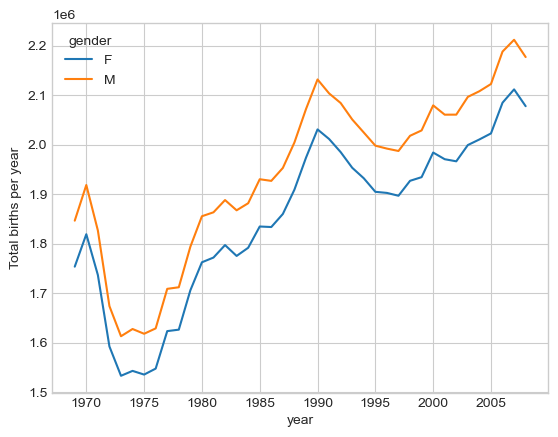

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

births.pivot_table(
    'births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()

plt.ylabel('Total births per year');

In [114]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [115]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)') 

In [118]:
# Set 'day' column to integers; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

C:\Users\vanli\AppData\Local\Temp\ipykernel_6716\1321078870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [119]:
# Create a datetime index from the year, month, day
births.index = pd.to_datetime(10_000 * births.year +
                              100 * births.month +
                              births.day, format = '%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\vanli\AppData\Local\Temp\ipykernel_6716\3202178010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


In [120]:
births

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


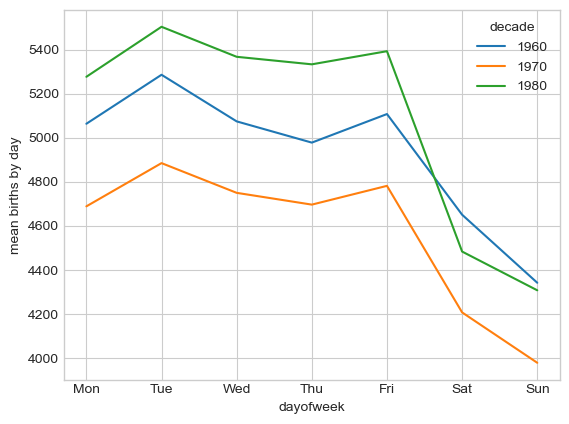

In [122]:
import matplotlib.pyplot as plt
import matplotlib as mlp

births.pivot_table('births', index = 'dayofweek',
                   columns = 'decade', aggfunc = 'mean').plot()

plt.gca().set(xticks = range(7),
              xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.ylabel('mean births by day');

In [125]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [126]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


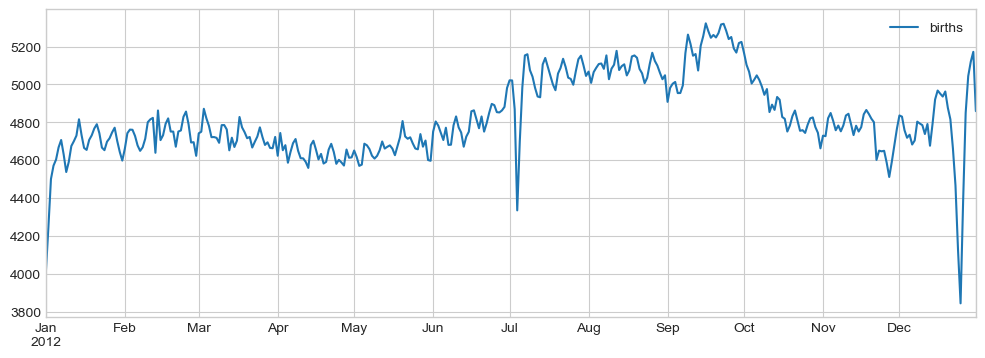

In [128]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax);

### Introducing Pandas String Operations

In [129]:
import numpy as np

In [130]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [131]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [133]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s if s is None else s.capitalize() for s in data]

['Peter', 'Paul', None, 'Mary', 'Guido']

In [134]:
import pandas as pd

In [135]:
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### Tables of Pandas String Methods

In [137]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

### Methods Similar to Python String Methods

In [139]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [140]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [141]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [142]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods Using Regular Expressions

In [143]:
monte.str.extract('([A-Za-z]+)', expand = False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [144]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous Methods

In [145]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [147]:
monte.str.slice(0, 3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [152]:
monte.str.get(0)

0    G
1    J
2    T
3    E
4    T
5    M
dtype: object

In [154]:
monte.str[0]

0    G
1    J
2    T
3    E
4    T
5    M
dtype: object

In [156]:
monte.str.split().str[-1]

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [157]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [159]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

In [170]:
# repo = "https://raw.githubusercontent.com/jakevdp/open-recipe-data/master"
# !cd data && curl -O {repo}/recipeitems.json.gz
# !gunzip data/recipeitems.json.gz

In [171]:
recipes = pd.read_json('recipeitems-latest.json', lines = True)
recipes.shape

(173278, 17)

In [172]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [173]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [174]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [179]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [180]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [181]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

### A Simple Recipe Recommender

In [182]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [183]:
import re
spice_df = pd.DataFrame({
    spice: recipes.ingredients.str.contains(spice, re.IGNORECASE)
    for spice in spice_list})
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [184]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [185]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

### Native Python Dates and Times: <code>datetime</code> and <code>dateutil</code>

In [1]:
from datetime import datetime

datetime(year = 2021, month = 7, day = 4)

datetime.datetime(2021, 7, 4, 0, 0)

In [2]:
from dateutil import parser

date = parser.parse('4th of July, 2021')
date

datetime.datetime(2021, 7, 4, 0, 0)

In [4]:
date2 = parser.parse('10 sep 1992')
date2

datetime.datetime(1992, 9, 10, 0, 0)

In [9]:
date3 = parser.parse('10jan1992')
date3

datetime.datetime(1992, 1, 10, 0, 0)

In [11]:
date.strftime('%A')

'Sunday'

### Typed Arrays of Times: NumPy’s <code>datetime64</code>

In [12]:
import numpy as np

In [13]:
date = np.array('2021-07-04', dtype = np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

In [14]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [15]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [16]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [17]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

### Dates and Times in Pandas: The Best of Both Worlds

In [18]:
import pandas as pd

In [23]:
date = pd.to_datetime('4th of July, 2021')
date

Timestamp('2021-07-04 00:00:00')

In [24]:
date.strftime('%A')

'Sunday'

In [25]:
pd.to_timedelta(np.arange(12), 'D')

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

In [26]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [27]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])

data = pd.Series([0, 1, 2, 3], index = index)

data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [28]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [29]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

### Pandas Time Series Data Structures

In [30]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                        '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [31]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [32]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular Sequences: <code>pd.date_range</code>

In [33]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range('2015-07-03', periods = 8, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [36]:
pd.period_range('2015-07', periods = 8, freq = 'M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [37]:
pd.timedelta_range(0, periods = 6, freq = 'H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets

In [38]:
pd.timedelta_range(0, periods = 6, freq = '2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150T')

In [39]:
pd.timedelta_range(0, periods = 6, freq = '4H17T')

TimedeltaIndex(['0 days 00:00:00', '0 days 04:17:00', '0 days 08:34:00',
                '0 days 12:51:00', '0 days 17:08:00', '0 days 21:25:00'],
               dtype='timedelta64[ns]', freq='257T')

In [48]:
pd.period_range('2023-11-16 20:50:00', periods = 6, freq = '108T')

PeriodIndex(['2023-11-16 20:50', '2023-11-16 22:38', '2023-11-17 00:26',
             '2023-11-17 02:14', '2023-11-17 04:02', '2023-11-17 05:50'],
            dtype='period[108T]')

In [49]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods = 6, freq = BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

In [51]:
from pandas.tseries.offsets import BDay
pd.date_range('2023-11-16', periods = 6, freq = BDay())

DatetimeIndex(['2023-11-16', '2023-11-17', '2023-11-20', '2023-11-21',
               '2023-11-22', '2023-11-23'],
              dtype='datetime64[ns]', freq='B')

### Resampling, Shifting, and Windowing

In [54]:
pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
from pandas_datareader import data

In [5]:
# sp500 = data.DataReader('^GSPC', start='2018', end='2022', 
#                        data_source='yahoo')
# sp500.head()

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = '^GSPC'

# Define the time frame
start_date = '2018-01-01'
end_date = '2022-01-01'

# Fetch the data
sp500 = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows
print(sp500.head())

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                Volume  
Date                    
2018-01-02  3397430000  
2018-01-03  3544030000  
2018-01-04  3697340000  
2018-01-05  3239280000  
2018-01-08  3246160000  


In [6]:
sp500 = sp500['Close']

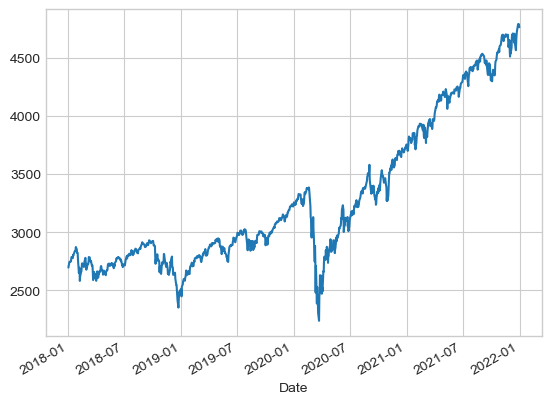

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
sp500.plot();

### Resampling and Converting Frequencies

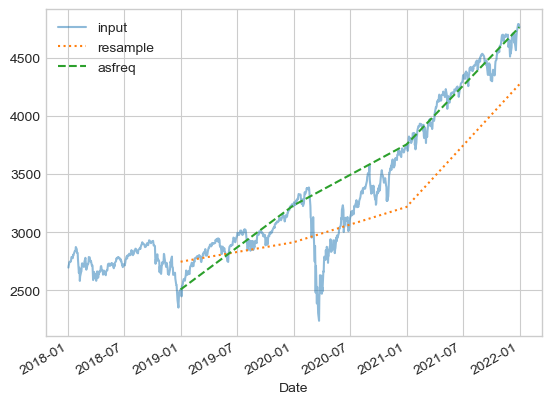

In [15]:
sp500.plot(alpha = 0.5, style = '-')

sp500.resample('BA').mean().plot(style = ':')

sp500.asfreq('BA').plot(style = '--');

plt.legend(['input', 'resample', 'asfreq'],
           loc = 'upper left');

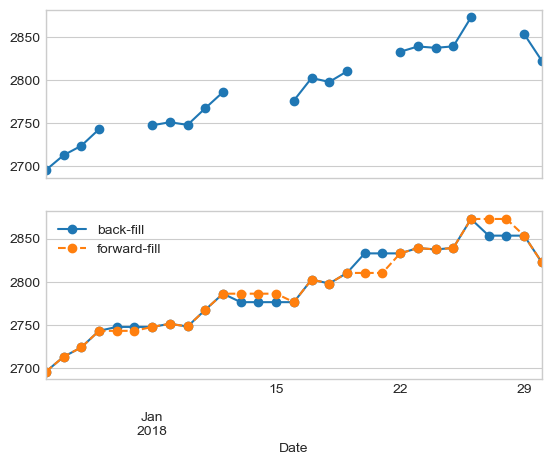

In [18]:
fig, ax = plt.subplots(2, sharex = True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax = ax[0], marker = 'o')

data.asfreq('D', method = 'bfill').plot(ax = ax[1], style = '-o')
data.asfreq('D', method = 'ffill').plot(ax = ax[1], style = '--o')
ax[1].legend(['back-fill', 'forward-fill']);

### Time Shifts

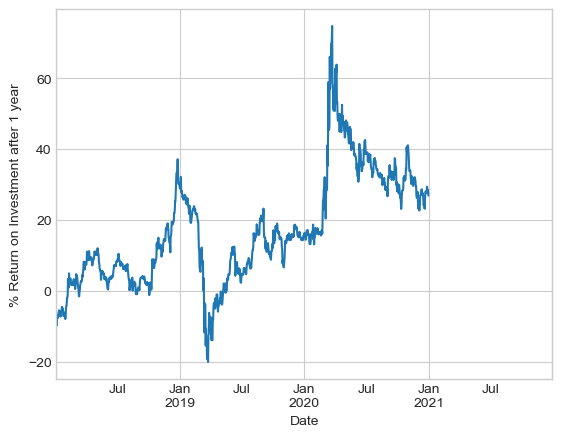

In [19]:
sp500 = sp500.asfreq('D', method = 'pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel('% Return on Investment after 1 year');

### Rolling Windows

In [21]:
import pandas as pd

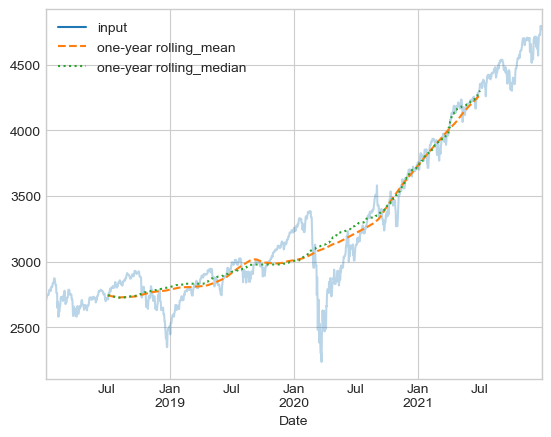

In [23]:
rolling = sp500.rolling(365, center = True)

data = pd.DataFrame({'input': sp500,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_median': rolling.median()})

ax = data.plot(style = ['-', '--', ':'])
ax.lines[0].set_alpha(0.3)